In [54]:
%matplotlib inline
import csv

import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
label_names = ['AdenomeraAndre', 'AdenomeraHylaedactylus', 'Ameeregatrivittata', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae',
               'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber']

def load_frog_data():
    '''Function for loading Frog MFCC data.  See data/Readme.txt for details about the data set'''

    # Load Data from CSV File
    with open("data/Frogs_MFCCs.csv") as f:
        reader = csv.reader(f, delimiter=",")

        X = []   # array for feature vectors
        y = []   # array for ground truth labels
        for i, row in enumerate(reader):
            # ignore first row since it is just headers
            if i ==0:
                continue

            X.append(row[:-4])                    # append feature vector from CSV row
            y.append(label_names.index(row[-2]))  # append ground truth label from CSV row (converting from categorical to int)

    return np.array(X).astype(float), np.array(y).astype(int)

In [30]:
# Load the Data
X, y = load_frog_data()
print ("X Shape:", X.shape, "\tType:", X.dtype)
print ("y Shape:", y.shape, "\tType:", y.dtype)

X Shape: (7195, 22) 	Type: float64
y Shape: (7195,) 	Type: int64


In [94]:
# Print a few rows of the data
float_formatter = lambda x: "%7.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

for i in range(0, 7195, 700):
    print (y[i], ":", label_names[y[i]])
    print (X[i],end="\n\n")
    
print (np.unique(y, return_counts=True))

0 : AdenomeraAndre
[ 1.0000  0.1529 -0.1056  0.2007  0.3172  0.2608  0.1009 -0.1501 -0.1711
  0.1247  0.1887 -0.0756 -0.1564  0.0822  0.1358 -0.0240 -0.1084 -0.0776
 -0.0096  0.0577  0.1187  0.0140]

2 : Ameeregatrivittata
[ 1.0000  0.2883  0.0112  0.1914  0.2093  0.2870  0.2245 -0.1522 -0.3491
 -0.0778  0.1922  0.0963  0.0526  0.0429 -0.0980 -0.1838  0.0230  0.1612
 -0.0392 -0.1247  0.0201  0.0398]

1 : AdenomeraHylaedactylus
[ 1.0000  0.2358  0.1993  0.4340  0.0705 -0.0294 -0.1233  0.0748  0.2814
 -0.0240 -0.2762  0.2228  0.2962 -0.2147 -0.2020  0.2300  0.2485 -0.0045
 -0.1499 -0.1002  0.1618  0.1564]

1 : AdenomeraHylaedactylus
[ 1.0000  0.3484  0.1449  0.5866  0.2859  0.1658  0.0348  0.1561  0.2696
 -0.0333 -0.3005  0.1398  0.3561 -0.0858 -0.2152  0.0690  0.1192  0.0517
  0.0286  0.0001  0.0990  0.1359]

1 : AdenomeraHylaedactylus
[ 1.0000  0.2677  0.2058  0.5103  0.2262  0.0730 -0.0954 -0.0321  0.2290
  0.0513 -0.3387 -0.0154  0.3811 -0.0113 -0.3398 -0.0318  0.2273  0.0921
 -0.022

In [56]:
# Import evaluation functions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

In [57]:
# Initialize a few classifiers for comparison
clfs = [DecisionTreeClassifier(), SVC(), BernoulliNB()]

In [72]:
# Train and Score each classifier on a standard single training/test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf).__name__, clf.score(X_test, y_test))

DecisionTreeClassifier 0.940236275191
SVC 0.917998610146
BernoulliNB 0.876997915219


In [77]:
# Evaluate using 5-Fold Cross Evaluation
for clf in clfs:
    score = cross_val_score(clf, X, y, cv=5)
    print (type(clf).__name__, score, np.average(score))

DecisionTreeClassifier [ 0.8205  0.8890  0.9187  0.9283  0.8669] 0.884684257747
SVC [ 0.8808  0.9244  0.9187  0.9178  0.8732] 0.902981197731
BernoulliNB [ 0.8212  0.8245  0.8888  0.8558  0.8634] 0.850766189894


DecisionTreeClassifier
[[150   1   5   2   3   0   1   2   0   0]
 [  0 672   1   4   0   3   0   0   3   0]
 [  3   0  92   2   0   0   0   0   0   2]
 [  3   6   2  44   0   0   0   0   0   2]
 [  0   0   0   0  94   3   2   1   0   0]
 [  0   2   0   1   1 202   2   2   3   2]
 [  1   0   0   0   2   2  43   0   1   0]
 [  1   0   0   0   1   2   1  19   0   0]
 [  0   1   0   0   0   0   0   0  10   0]
 [  1   0   1   1   1   0   1   1   1  30]]

SVC
[[150   0  11   0   1   0   0   2   0   0]
 [  0 682   0   0   0   1   0   0   0   0]
 [  0   0  98   1   0   0   0   0   0   0]
 [ 14  10   8  22   0   3   0   0   0   0]
 [  2   0   0   0  94   3   0   1   0   0]
 [  0   2   0   0   2 208   3   0   0   0]
 [  2   0   0   2   0   4  41   0   0   0]
 [  0   0   0   0   3  20   0   1   0   0]
 [  0   0   0   0   1   9   1   0   0   0]
 [  0   0   4   0   0   8   0   0   0  25]]

BernoulliNB
[[132   0  23   0   3   0   1   3   2   0]
 [  0 667   0  12   1   0   0   0   0   3]
 [  2   0  

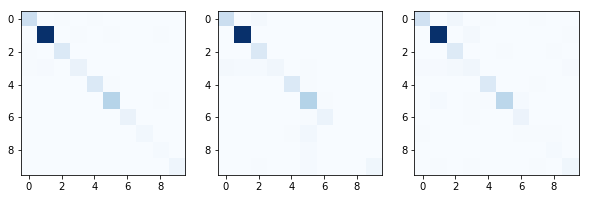

In [103]:
# print confusion matrices for each classifier
plt.figure(figsize=(10,4))
for i, clf in enumerate(clfs):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
        
    print (type(clf).__name__)
    print (cm)
    print()
    
    plt.subplot(1, len(clfs), i+1)
    plt.imshow(cm, cmap="Blues")

DecisionTreeClassifier
[[ 0.89  0.01  0.04  0.02  0.02  0.00  0.01  0.01  0.00  0.00]
 [ 0.00  0.98  0.00  0.01  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 0.03  0.00  0.94  0.02  0.00  0.00  0.00  0.00  0.00  0.01]
 [ 0.07  0.11  0.00  0.79  0.00  0.00  0.00  0.00  0.00  0.04]
 [ 0.02  0.00  0.00  0.00  0.92  0.03  0.02  0.01  0.00  0.00]
 [ 0.00  0.00  0.00  0.00  0.00  0.94  0.03  0.00  0.00  0.01]
 [ 0.02  0.00  0.00  0.00  0.02  0.04  0.88  0.02  0.02  0.00]
 [ 0.04  0.00  0.00  0.00  0.04  0.17  0.04  0.71  0.00  0.00]
 [ 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.91  0.09]
 [ 0.00  0.00  0.03  0.03  0.03  0.00  0.03  0.05  0.05  0.78]]

SVC
[[ 0.91  0.00  0.07  0.00  0.01  0.00  0.00  0.01  0.00  0.00]
 [ 0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 0.00  0.00  0.99  0.01  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 0.25  0.18  0.14  0.39  0.00  0.05  0.00  0.00  0.00  0.00]
 [ 0.02  0.00  0.00  0.00  0.94  0.03  0.00  0.01  0.00  0.00]
 [ 0.00  0.01  0.00  0.00 

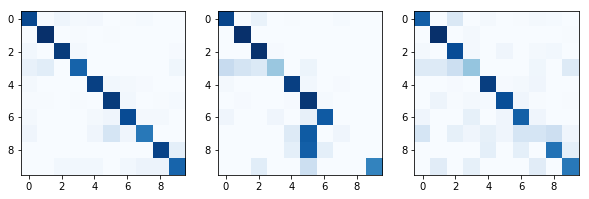

In [101]:
# visualize confusion matrices
float_formatter = lambda x: "%5.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

plt.figure(figsize=(10,4))
for i, clf in enumerate(clfs):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print (type(clf).__name__)
    print (cm)
    print()
    
    plt.subplot(1, len(clfs), i+1)
    plt.imshow(cm, cmap="Blues")

In [ ]:
# Calculate Precision and Recall